## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> PROJECT : Instance Based Learning </div>

#### <div align="center"> Semester Genap 2022/2023 </div>


---

### Anggota Kelompok 3:

1. Muhamad Baehaky - 00000070071
2. Maureen Audilia - 00000073951
3. Fiorenza Irene Christabelle Suryanto - 00000067450

---

### Dataset yang dipakai:

1. [Breast Cancer (Wincostin)] – sumber : [https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data]

---

### Hasil kerja

#### Importing library

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('./data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [25]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [26]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


[Text(0, 0, '357'), Text(0, 0, '212')]

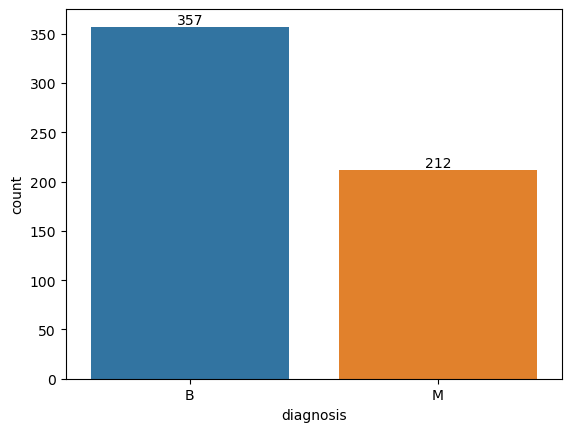

In [27]:
ax = sns.countplot(x=df['diagnosis'], order=df['diagnosis'].value_counts(ascending=False).index)
abs_values = df['diagnosis'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

<Axes: xlabel='radius_mean', ylabel='Count'>

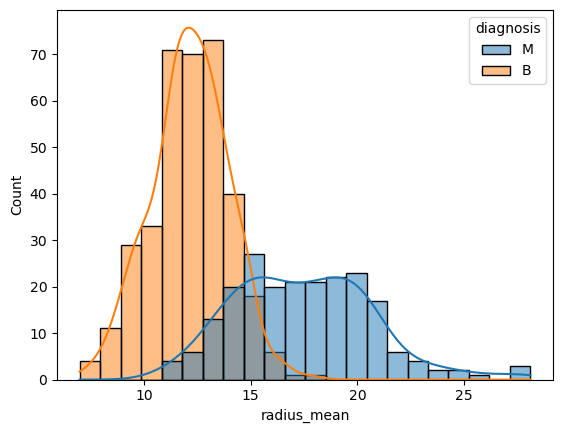

In [28]:
sns.histplot(data=df, x="radius_mean", hue="diagnosis", kde=True)

In [29]:
print('Min radius of benign cancer :', df[df['diagnosis']=='B']['radius_mean'].min())
print('Max radius of benign cancer :', df[df['diagnosis']=='B']['radius_mean'].max())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['radius_mean'].min())
print('Max radius of malignant cancer :', df[df['diagnosis']=='M']['radius_mean'].max())

Min radius of benign cancer : 6.981
Max radius of benign cancer : 17.85
Min radius of malignant cancer : 10.95
Max radius of malignant cancer : 28.11


In [30]:
df['radius_mean'].head()

0    17.99
1    20.57
2    19.69
3    11.42
4    20.29
Name: radius_mean, dtype: float64

<Axes: xlabel='texture_mean', ylabel='Count'>

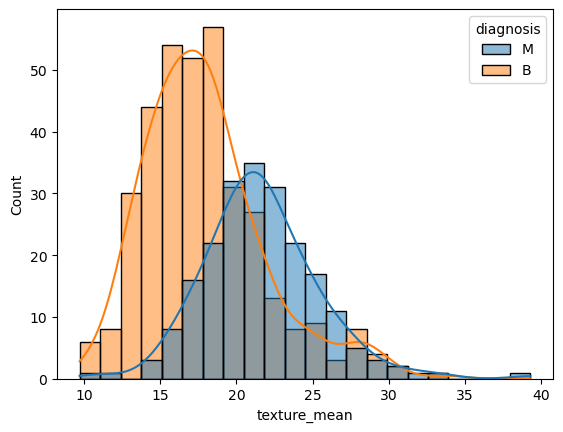

In [31]:
sns.histplot(data=df, x="texture_mean", hue="diagnosis", kde=True)

In [32]:
print('Min radius of benign cancer :', df[df['diagnosis']=='B']['texture_mean'].min())
print('Max radius of benign cancer :', df[df['diagnosis']=='B']['texture_mean'].max())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['texture_mean'].min())
print('Max radius of malignant cancer :', df[df['diagnosis']=='M']['texture_mean'].max())

Min radius of benign cancer : 9.71
Max radius of benign cancer : 33.81
Min radius of malignant cancer : 10.38
Max radius of malignant cancer : 39.28


<Axes: xlabel='concavity_mean', ylabel='Count'>

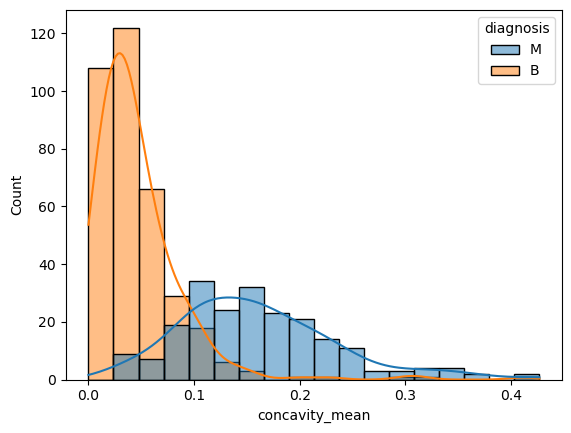

In [33]:
sns.histplot(data=df, x="concavity_mean", hue="diagnosis", kde=True)

In [34]:
print('Min radius of benign cancer :', df[df['diagnosis']=='B']['concavity_mean'].min())
print('Max radius of benign cancer :', df[df['diagnosis']=='B']['concavity_mean'].max())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['concavity_mean'].min())
print('Max radius of malignant cancer :', df[df['diagnosis']=='M']['concavity_mean'].max())

Min radius of benign cancer : 0.0
Max radius of benign cancer : 0.4108
Min radius of malignant cancer : 0.02398
Max radius of malignant cancer : 0.4268


<Axes: xlabel='concave points_mean', ylabel='Count'>

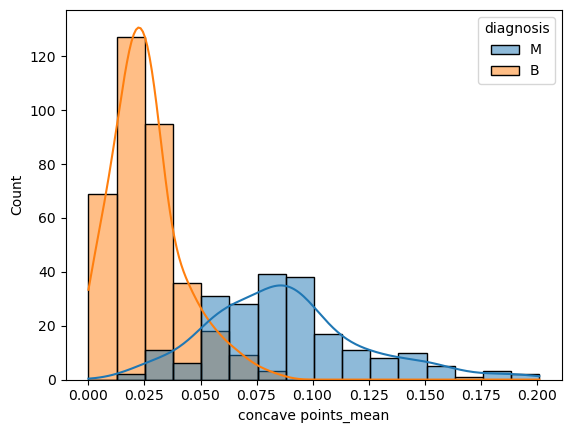

In [35]:
sns.histplot(data=df, x="concave points_mean", hue="diagnosis", kde=True)

In [36]:
print('Min radius of benign cancer :', df[df['diagnosis']=='B']['concave points_mean'].min())
print('Max radius of benign cancer :', df[df['diagnosis']=='B']['concave points_mean'].max())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['concave points_mean'].min())
print('Max radius of malignant cancer :', df[df['diagnosis']=='M']['concave points_mean'].max())

Min radius of benign cancer : 0.0
Max radius of benign cancer : 0.08534
Min radius of malignant cancer : 0.02031
Max radius of malignant cancer : 0.2012


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

<Axes: >

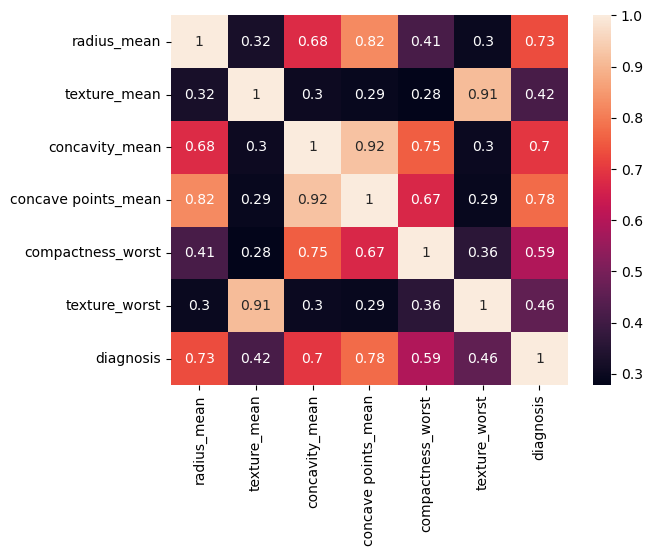

In [38]:
sns.heatmap(df[["radius_mean","texture_mean","concavity_mean",'concave points_mean','compactness_worst','texture_worst','diagnosis']].corr(), annot=True)

In [39]:
X = df[['radius_mean','texture_mean','concavity_mean','concave points_mean']]
y = df["diagnosis"]

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X['radius_mean'] = scaler.fit_transform(X['radius_mean'].values.reshape(-1, 1))
X['texture_mean'] = scaler.fit_transform(X['texture_mean'].values.reshape(-1, 1))
X['concavity_mean'] = scaler.fit_transform(X['concavity_mean'].values.reshape(-1, 1))
X['concave points_mean'] = scaler.fit_transform(X['concave points_mean'].values.reshape(-1, 1))
X.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22756\2073683616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['radius_mean'] = scaler.fit_transform(X['radius_mean'].values.reshape(-1, 1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22756\2073683616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['texture_mean'] = scaler.fit_transform(X['texture_mean'].values.reshape(-1, 1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22756\2073683616.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

,radius_mean,texture_mean,concavity_mean,concave points_mean
0,1.097064,-2.073335,2.652874,2.532475
1,1.829821,-0.353632,-0.023846,0.548144
2,1.579888,0.456187,1.363478,2.037231
3,-0.768909,0.253732,1.915897,1.451707
4,1.750297,-1.151816,1.371011,1.428493


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, stratify=y ,test_size=0.2, random_state=41)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [43]:
y_pred = knn.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy test:", accuracy)
print("Precision test:", precision)
print("Recall test:", recall)

Accuracy test: 0.956140350877193
Precision test: 0.9512195121951219
Recall test: 0.9285714285714286


Text(50.722222222222214, 0.5, 'predicted Values')

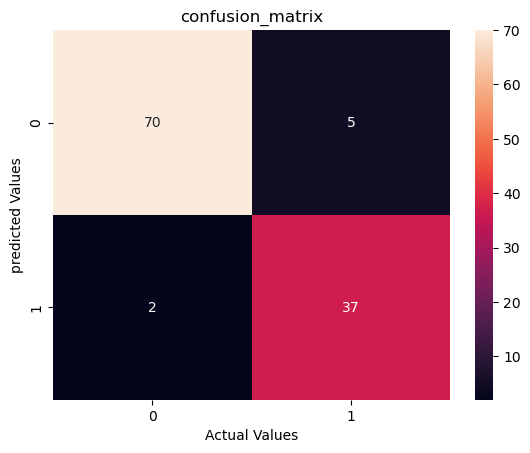

In [60]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.title("confusion_matrix")
plt.xlabel("Actual Values")
plt.ylabel("predicted Values")

In [46]:
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,20)]
scores = []
evaluation = {
    'K':[],
    'accuracy':[],
    'recall':[],
    'precision':[]
}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    score = cross_val_score(knn, x_train, y_train, cv=10)
    scores.append(np.mean(score))
    evaluation['K'].append(k)
    evaluation['accuracy'].append(accuracy)
    evaluation['precision'].append(precision)
    evaluation['recall'].append(recall)

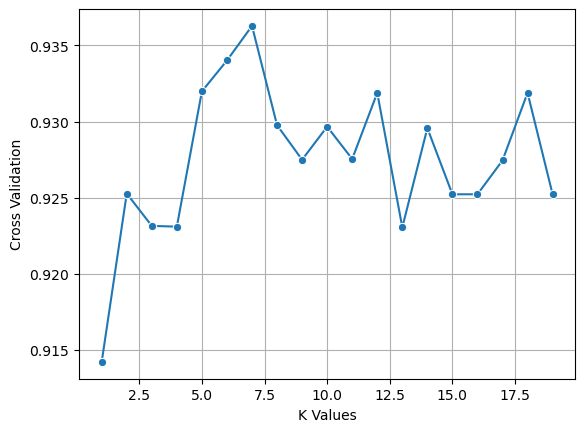

In [47]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Cross Validation")
plt.grid()

In [48]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
cross_validaton_df = pd.DataFrame({'K-values':k_values, 'Score':scores})
print("K-values = {} \nScore = {:.4f}".format(best_k, max(scores)))
cross_validaton_df.head(20)

K-values = 7 
Score = 0.9363


,K-values,Score
0,1,0.914203
1,2,0.925266
2,3,0.923140
3,4,0.923092
4,5,0.931981
5,6,0.934010
6,7,0.936280
7,8,0.929758
8,9,0.927488
9,10,0.929662


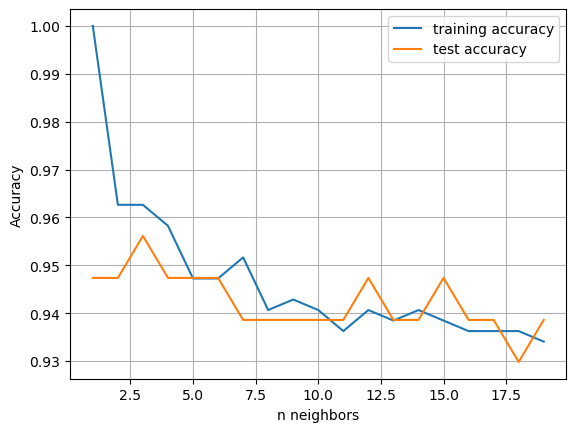

In [49]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,metric='euclidean')
    clf.fit(x_train, y_train) 
    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("n neighbors")
plt.legend()

In [50]:
accuracy_train_test = pd.DataFrame({'K-values': neighbors_settings, 'Train_accuracy': training_accuracy, 'Test_accuracy': test_accuracy})
accuracy_train_test.head(20)

,K-values,Train_accuracy,Test_accuracy
0,1,1.000000,0.947368
1,2,0.962637,0.947368
2,3,0.962637,0.956140
3,4,0.958242,0.947368
4,5,0.947253,0.947368
5,6,0.947253,0.947368
6,7,0.951648,0.938596
7,8,0.940659,0.938596
8,9,0.942857,0.938596
9,10,0.940659,0.938596


In [51]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

fix_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
fix_knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

<Axes: >

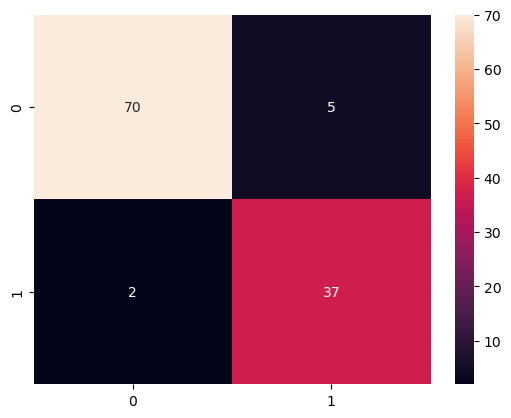

In [52]:
y_pred_fix = fix_knn.predict(x_test)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

In [53]:
predict = pd.DataFrame({'Test': y_test, 'Predict': y_pred})
predict.head(10)

,Test,Predict
310,0,0
158,0,0
410,0,0
503,1,1
169,0,0
381,0,0
554,0,0
254,1,1
39,1,0
191,0,0


In [54]:
accuracy = accuracy_score(y_test, y_pred_fix)
precision = precision_score(y_test, y_pred_fix)
recall = recall_score(y_test, y_pred_fix)

print("Accuracy test:", accuracy)
print("Precision test:", precision)
print("Recall test:", recall)

Accuracy test: 0.9385964912280702
Precision test: 0.926829268292683
Recall test: 0.9047619047619048


In [55]:
# !jupyter nbconvert --to html "./Template Laporan Tugas Mingguan Lab IF540.ipynb" --output-dir="./"